In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
mass_ = array([500,400,300,200,120,100,80,70,60,50,40,30,25,20,15,12,9]) 
age_ = array([1.89, 1.97, 2.07, 2.24, 2.55, 2.70, 2.93, 3.10, 3.33, 3.67, 4.21, 5.20, 6.07, 7.53, 10.37, 13.81, 21.04])

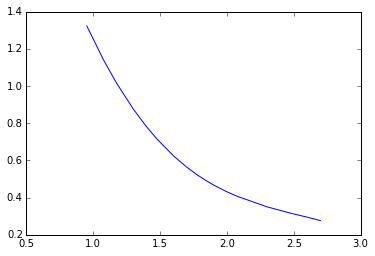

In [7]:
plot(log10(mass_), log10(age_))

In [29]:
alpha = 2.35
m_min = mass_.min()
m_max = mass_.max()
print m_min, m_max

print norm_pdf_

def cumulative_pdf(x):
    norm_pdf_ = (1.0-alpha) / (m_max**(1.0-alpha) - m_min**(1.0-alpha))
    cpdf = norm_pdf_ * (x**(1.0-alpha) - m_min**(1.0-alpha))/(1.0-alpha)
    return cpdf

9 500
14.4482047594


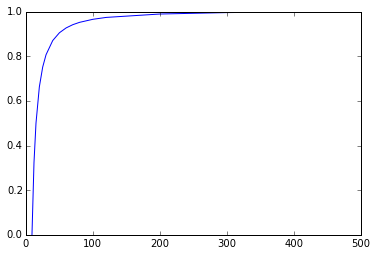

In [30]:
plot(mass_, cumulative_pdf(mass_))

In [33]:
from scipy import optimize

In [42]:
n_stream = 1000
stream_mass = np.zeros(n_stream)
for i in arange(n_stream):
    g = lambda x: cumulative_pdf(x)-random.random()
    m_now = optimize.ridder(g,m_min, m_max)
    stream_mass[i] = m_now

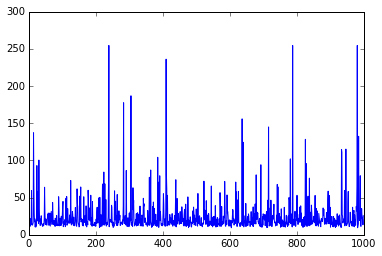

In [43]:
plot(stream_mass)

In [121]:
tmp_ = stream_mass.cumsum()
solar_mass_batch  = 1000

batch_id = -ones(n_stream, dtype=int)
n_batches = int(stream_mass.cumsum()[-1]/solar_mass_batch)
min_id = 0
for i in range(n_batches):
    print tmp_[min_id]
    if(min_id==0):
        max_id = where( ((tmp_) > 0) & (( tmp_) < solar_mass_batch))
    else:
        max_id = where( ((tmp_- tmp_[min_id-1]) > 0) & (( tmp_- tmp_[min_id-1]) < solar_mass_batch))  
    max_id = max_id[0][-1]
    print min_id, max_id
    batch_id[min_id:max_id+1] = i
    min_id = max_id+1

30.1255201302
0 30
1013.57963449
31 80
1990.59448178
81 124
3005.17821319
125 165
3947.86955932
166 208
4940.14173561
209 238
5993.59363061
239 272
6741.03416721
273 304
7737.26433133
305 342
8560.15559381
343 384
9607.99742027
385 410
10531.9843129
411 451
11470.373248
452 499
12469.4996065
500 544
13447.1065501
545 589
14390.6793954
590 632
15375.2661433
633 672
16386.9549243
673 713
17358.4667117
714 749
18331.3747631
750 787
19380.3684082
788 822
20127.0006886
823 855
21105.2751004
856 899
22099.3470013
900 942


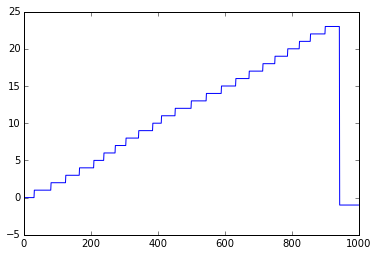

In [122]:
plot(batch_id)

(979.07129455811491, 31)
[  10.45485299   10.51136092   11.52253521   13.01170207   13.02283179
   13.37696349   13.50036598   14.04640839   14.53221202   14.7943119
   14.99962256   15.63312674   16.52757222   17.5381881    18.34769458
   18.40468642   18.54860907   21.31755905   21.5163843    21.60842849
   27.18934148   28.82525298   30.12552013   30.68813995   33.52139576
   58.39712509   59.41960695   67.03312101   93.04408304  100.43776014
  137.17453173]
(993.10427469885883, 50)
[ 11.23393883  11.51467089  11.70114976  11.87030086  12.05254848
  12.59900809  12.72649334  12.97228387  13.00410422  13.30240769
  13.41424484  13.60901134  13.66660786  13.7366122   13.75593737
  13.90936242  13.91797731  14.09284611  14.43898918  14.52736597
  14.53390254  14.79832539  14.79893846  14.96802169  15.34359318
  17.38107209  17.4759425   18.07422544  18.47482799  18.84304189
  19.16181135  19.43646179  21.26689899  21.33987893  21.71542857
  22.17163304  22.35499736  22.89961251  25.571

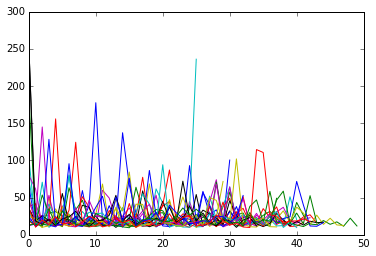

In [130]:
for i in range(n_batches):
    plot(stream_mass[batch_id==i])
    print(stream_mass[batch_id==i].sum(), len(stream_mass[batch_id==i]))
    print sort(stream_mass[batch_id==i])